# Max of a non linear function


A genetic algorithm to maximize a non linear function.

Based on the script in:

https://github.com/danielTeniente/ia-projects/blob/main/Algoritmos_geneticos/Maximizar_funcion.ipynb

In [ ]:
#import the requierd libraries
import matplotlib.pyplot as plt
import numpy as np
import math

## The problem

Find the vaue of $x$ that maximizes the value of $y$ for the following function:

In [ ]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2+x/5

In [ ]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))


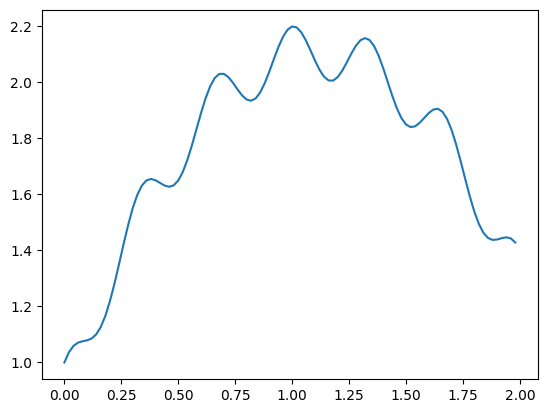

In [ ]:
plt.plot(x_axis,y_axis)

The function has several local max and min.

Two aproaches. One with genes represented as decimals and another as binary.


## Genetic algorithm

### Representation of solutions

First, codify the solutions. This is a crucial step. We will start coding in decimal.

In [ ]:
# Example of an Individual
x = 0.54
y = fx(x)

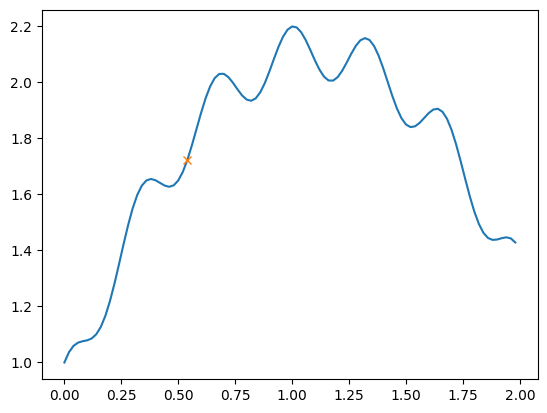

In [ ]:
plt.plot(x_axis,y_axis)
plt.plot(x,y,'x')

The individual is represeted by an x in the upper plot. The population is composed by numbers in the range (0-2).

In [ ]:
# Example of inidvidual
#x = 0.25
x = [0,2,5]

We want to represent genes as a list to perform mutation and crossover.

In [ ]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

In [ ]:
listToDecimal(x)

0.25

For a more accurate representation, individuals will be represented with a much larger genotipe `ind_size` (that will be used to create a random genetic code).

In [ ]:
ind_size = 15
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo

[1, 0, 9, 1, 6, 2, 7, 1, 6, 7, 7, 8, 0, 0, 2]

This individual has a genotype of 15 genes. Genes are chosen from a  `genetic_pool` representing all potential values.


In [ ]:
listToDecimal(individuo)

1.09162716778002

The list is converted to decimal (a small rounding effect appears).

In [ ]:
poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]

[[1, 0, 4, 6, 0, 4, 5, 4, 1, 5, 2, 5, 8, 4, 4],
 [1, 9, 3, 3, 4, 7, 1, 4, 4, 2, 3, 5, 8, 7, 0],
 [0, 9, 7, 9, 3, 7, 1, 6, 1, 6, 7, 4, 2, 0, 2],
 [1, 4, 0, 1, 2, 7, 6, 4, 6, 6, 7, 8, 7, 8, 7],
 [0, 0, 6, 2, 3, 5, 1, 9, 6, 8, 5, 2, 4, 2, 9],
 [1, 8, 3, 4, 4, 4, 9, 7, 5, 1, 0, 7, 5, 5, 8],
 [0, 2, 8, 5, 7, 5, 5, 1, 6, 3, 3, 8, 6, 8, 4],
 [1, 8, 2, 9, 8, 8, 0, 6, 7, 4, 4, 4, 2, 9, 2],
 [1, 0, 4, 7, 1, 8, 4, 4, 6, 7, 3, 9, 7, 4, 3],
 [0, 3, 8, 1, 5, 8, 4, 0, 7, 4, 3, 0, 5, 2, 0]]

A random population is now generated.

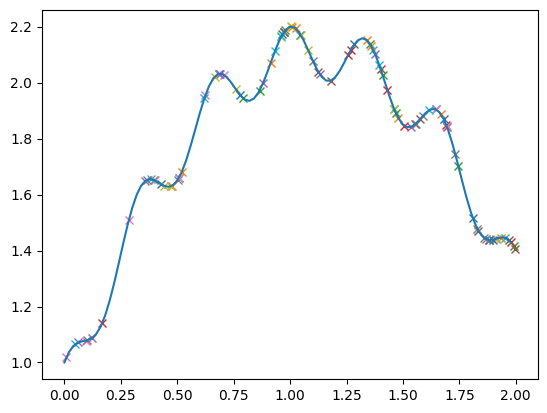

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

### Fitness

The fitness of the individual is calculated, as well as the probability to reproduce. The individuals with the highest value for $y$ will be selected as best.

In [ ]:
fitness =[]

#extract the values for y to evaluate their fitness
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]

#convert fitness into a vector to operate easily
fitness = np.array(fitness)

#divide all y values by their sum so we get values between 0 and 1
fitness=fitness/fitness.sum()

In [ ]:
fitness

array([0.0120757 , 0.00804299, 0.01216608, 0.01138681, 0.00595972,
       0.00817717, 0.00839296, 0.00821543, 0.01206719, 0.0092041 ,
       0.00843952, 0.01150589, 0.00922669, 0.00799384, 0.0111103 ,
       0.01029745, 0.00599515, 0.0103054 , 0.0117597 , 0.01176911,
       0.01087289, 0.01223298, 0.01096214, 0.00634455, 0.00918715,
       0.01039183, 0.00801769, 0.0096928 , 0.00802211, 0.01059051,
       0.00910119, 0.01219793, 0.0078671 , 0.01212437, 0.0116929 ,
       0.01212281, 0.00566456, 0.0060013 , 0.01202193, 0.01174858,
       0.00799534, 0.01041316, 0.00918159, 0.0079607 , 0.00905887,
       0.01058693, 0.00918091, 0.00919399, 0.01223586, 0.01204307,
       0.0118824 , 0.00934484, 0.00946154, 0.01028106, 0.00604695,
       0.01133827, 0.01058997, 0.00916335, 0.0090675 , 0.00591873,
       0.00799921, 0.01196211, 0.01188811, 0.0117603 , 0.0102418 ,
       0.01024116, 0.01127348, 0.00804309, 0.01059818, 0.00803935,
       0.01129979, 0.00906787, 0.01127489, 0.01097342, 0.01129

$y$ values are divided by their sum to get a probability.

In [ ]:
array = np.array([8,5])
array = array/array.sum()
array

array([0.61538462, 0.38461538])

Much easier to visualize with numbers summing up ten.

In [ ]:
array = np.array([8,2])
array = array/array.sum()
array

array([0.8, 0.2])

Large numbers provide a larger percentage, because probabiity is between 0 and 1. Thus, we get a higher probability for those individuals with higher $y$.

### Crossover

Two parents are randomly chosen according to the fitness probability.  
The worst inidvidulas are not rejected. They could help later.
A cross point is chosen `cross_point` to combine the genes ofthe parents.

In [ ]:
size_poblacion = len(poblacion)
# Offsprings
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [ ]:
offspring[:10]

[[1, 0, 1, 0, 6, 2, 1, 9, 2, 8, 0, 6, 1, 1, 5],
 [1, 1, 2, 4, 6, 7, 9, 9, 4, 2, 2, 8, 6, 9, 8],
 [1, 3, 9, 4, 8, 8, 3, 3, 8, 6, 5, 9, 6, 4, 9],
 [1, 1, 8, 0, 5, 9, 8, 1, 8, 9, 5, 8, 1, 9, 1],
 [1, 0, 1, 0, 6, 5, 2, 9, 8, 7, 1, 9, 5, 6, 5],
 [0, 6, 2, 0, 6, 2, 1, 9, 2, 8, 0, 6, 6, 9, 8],
 [0, 3, 9, 9, 4, 3, 7, 2, 9, 6, 8, 2, 7, 4, 3],
 [1, 0, 4, 7, 1, 8, 4, 4, 6, 7, 3, 9, 6, 4, 1],
 [1, 8, 6, 9, 7, 9, 1, 6, 1, 4, 9, 3, 7, 7, 2],
 [1, 5, 5, 4, 9, 8, 0, 9, 6, 5, 8, 2, 8, 3, 7]]

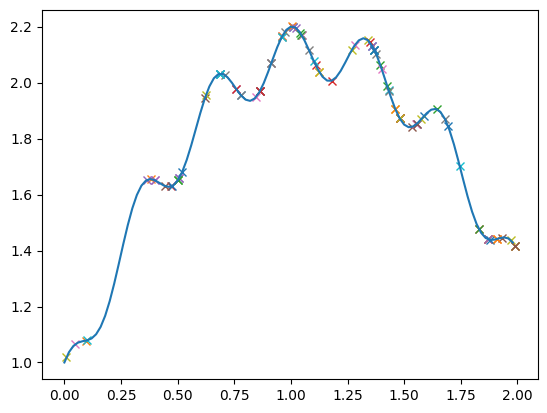

In [ ]:
poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In only one generations inidivuelas are concentrated in the top.

### Mutations

 The individual `[0,5,3,8,9]` cudl muatate to `[0,5,4,8,9]`, operning the door to improve the population.

In [ ]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]

        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [ ]:
mutate(poblacion,0.005,genetic_pool)
poblacion[:10]

[[1, 0, 1, 0, 6, 2, 1, 9, 2, 8, 0, 6, 5, 1, 5],
 [1, 1, 2, 4, 6, 7, 9, 9, 4, 2, 2, 8, 6, 9, 8],
 [1, 3, 9, 4, 8, 8, 3, 3, 8, 6, 5, 9, 6, 4, 9],
 [1, 1, 8, 0, 5, 9, 8, 1, 8, 9, 5, 8, 1, 9, 1],
 [1, 0, 1, 0, 6, 5, 2, 9, 8, 7, 1, 9, 5, 6, 5],
 [0, 6, 2, 0, 6, 2, 1, 9, 2, 8, 0, 6, 6, 9, 8],
 [0, 3, 9, 9, 4, 3, 7, 2, 9, 6, 8, 2, 7, 4, 3],
 [1, 0, 4, 7, 1, 8, 4, 4, 6, 7, 3, 9, 6, 4, 1],
 [1, 8, 6, 9, 7, 9, 1, 6, 1, 4, 9, 3, 7, 7, 2],
 [1, 5, 5, 4, 9, 8, 0, 9, 6, 5, 8, 2, 8, 3, 7]]

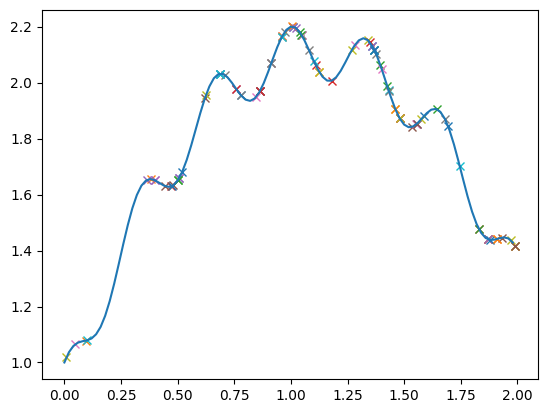

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Changes are not signifiant because the probability of mutation is low. Mutation must be unfrequent.

### Final result

In [ ]:
generaciones = 100

for _ in range(generaciones):

    fitness =[]

    #extract the values for y to evaluate their fitness
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convert fitness into a vector to operate easily
    fitness = np.array(fitness)

    #divide all y values by their sum so we get values between 0 and 1
    fitness=fitness/fitness.sum()


    #best inidvduals are reproduced
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

    poblacion = offspring

    #####
    # MUTATIONS
    ####

    mutate(poblacion,0.005,genetic_pool)


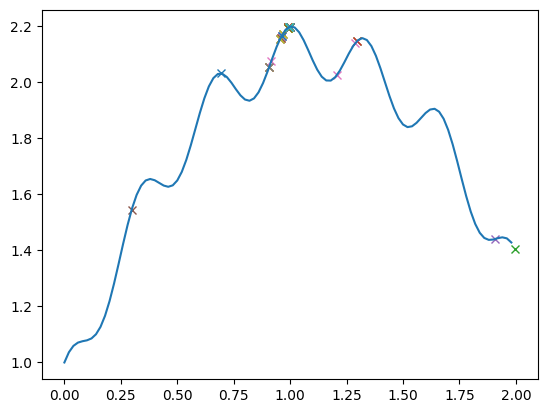

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

After 100 generations most individuals are concentrated around the max value.

In [ ]:
np.where(fitness == fitness.max())

(array([80]),)

In [ ]:
listToDecimal(poblacion[41])

0.9073216483224901

The best inidviudal has a value of 0.907, with an amplitude of 2.055.

In [ ]:
fx(listToDecimal(poblacion[41]))

2.055351061577246

We can iterate for more generations.

In [ ]:
generaciones = 300

for _ in range(generaciones):

    fitness =[]

    #extract the values for y to evaluate their fitness
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convert fitness into a vector to operate easily
    fitness = np.array(fitness)

    #divide all y values by their sum so we get values between 0 and 1
    fitness=fitness/fitness.sum()


    # Reproduction of the best individuals
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

    poblacion = offspring

    #####
    # MUTATIONS
    ####

    mutate(poblacion,0.005,genetic_pool)


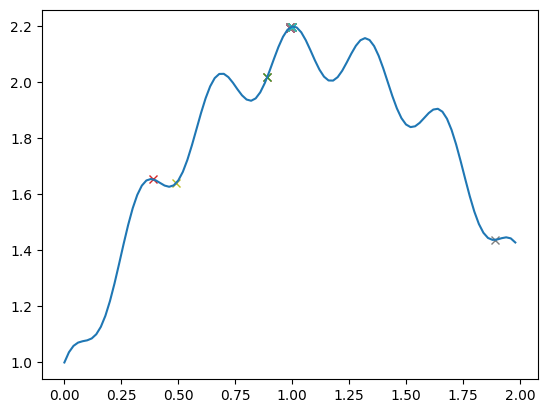

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Afer 300 generations all individuals are close to the max.

In [ ]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

0.9904267276864599

The best indivicual is 0.99. This is not exact, but is a good aproximation.
A better solution is obtained using binary DNA.

## Binary DNA


Instead of represeting binary numbers, we represent a division, and the solution will be more stable.

In [ ]:
def bin_decimal(num_binario):
    return (np.sum(num_binario)/len(num_binario))*2

The previous function transforms a list of binary numbers into a decimal number (0-2).
This is carried out summing up all 1s and later dividing by the size of the genotipe, reutring a number in (0-1). It is later multiplied by 2 to scale ir into (0-2)


In [ ]:
# Sump up all 1s
individuo = [0,1,1,1,1,0]
bin_decimal(individuo)

1.3333333333333333

In [ ]:
4/6 * 2

1.3333333333333333

Now we repeat the former steps.

In [ ]:
poblacion = []
genetic_pool = [0,1]
for i in range(100):
    individuo = list(np.random.choice(genetic_pool,15))
    poblacion.append(individuo)
poblacion[:10]

[[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
 [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0]]

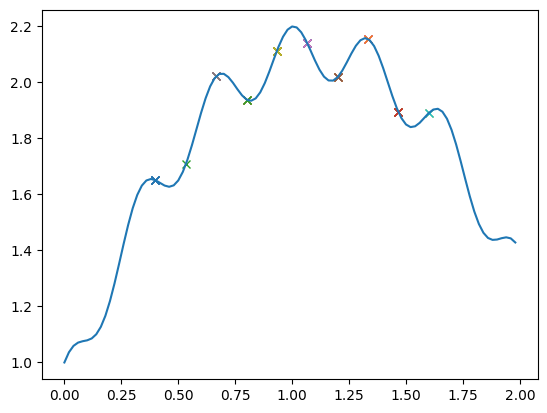

In [ ]:
for individuo in poblacion:
    x = bin_decimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Finish the algorithm...
